In [1]:
# IMPORT LIBRARIES
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import import_ipynb
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import related ipynb files
# import dataAcq as da

In [2]:
# Reading the dataset through a Pandas function
data = pd.read_csv("ovr_data_v1.csv")

data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2010-08-14,Aston Villa,West Ham,3,0,H,2.0,0.0,H,...,11,2,15,15,16,7,1,2,0,0
1,E0,2010-08-14,Blackburn,Everton,1,0,H,1.0,0.0,H,...,2,12,19,14,1,3,2,1,0,0
2,E0,2010-08-14,Bolton,Fulham,0,0,D,0.0,0.0,D,...,9,7,12,13,4,8,1,3,0,0
3,E0,2010-08-14,Chelsea,West Brom,6,0,H,2.0,0.0,H,...,13,4,10,10,3,1,1,0,0,0
4,E0,2010-08-14,Sunderland,Birmingham,2,2,D,1.0,0.0,H,...,2,7,13,10,3,6,3,3,1,0


In [3]:
# Data Manipulation

# Remove rows with missing value
data = data.dropna()

# Parse all the columns to integer for convenience
data['FTHG'] = data['FTHG'].astype(int)
data['FTAG'] = data['FTAG'].astype(int)
data['HS'] = data['HS'].astype(int)
data['AS'] = data['AS'].astype(int)
data['HST'] = data['HST'].astype(int)
data['AST'] = data['AST'].astype(int)
data['HF'] = data['HF'].astype(int)
data['AF'] = data['AF'].astype(int)
data['HC'] = data['HC'].astype(int)
data['AC'] = data['AC'].astype(int)
data['HY'] = data['HY'].astype(int)
data['AY'] = data['AY'].astype(int)
data['HR'] = data['HR'].astype(int)
data['AR'] = data['AR'].astype(int)

# Filter by Division
def Div(Div):
    
    return data[data['Div'] == Div][['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','HTR',
                                     'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','FTR']]

data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2010-08-14,Aston Villa,West Ham,3,0,H,2.0,0.0,H,...,11,2,15,15,16,7,1,2,0,0
1,E0,2010-08-14,Blackburn,Everton,1,0,H,1.0,0.0,H,...,2,12,19,14,1,3,2,1,0,0
2,E0,2010-08-14,Bolton,Fulham,0,0,D,0.0,0.0,D,...,9,7,12,13,4,8,1,3,0,0
3,E0,2010-08-14,Chelsea,West Brom,6,0,H,2.0,0.0,H,...,13,4,10,10,3,1,1,0,0,0
4,E0,2010-08-14,Sunderland,Birmingham,2,2,D,1.0,0.0,H,...,2,7,13,10,3,6,3,3,1,0


In [4]:
# Factor 1: Home/Away Ground

# England
dEng = Div("E0")
dEng = dEng['FTR'].value_counts()

# Spain
dEsp = Div("SP1")
dEsp = dEsp['FTR'].value_counts()

# France
dFra = Div("F1")
dFra = dFra['FTR'].value_counts()

# Germany
dDeu = Div("D1")
dDeu = dDeu['FTR'].value_counts()

# Italy
dIta = Div("I1")
dIta = dIta['FTR'].value_counts()

# result_stats = pd.concat([dEng,dEsp,dFra,dDeu,dIta])
result_stats = pd.DataFrame({"England": dEng,
                             "Spain": dEsp,
                             "France": dFra,
                             "Germany": dDeu,
                             "Italy": dIta,})

df = Div("I1")
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
14359,I1,2010-08-28,Roma,Cesena,0,0,0.0,0.0,D,24,...,3,11,17,10,8,3,3,0,0,D
14360,I1,2010-08-28,Udinese,Genoa,0,1,0.0,0.0,D,14,...,4,12,15,9,3,2,3,0,0,A
14361,I1,2010-08-29,Bari,Juventus,1,0,1.0,0.0,H,20,...,2,14,12,7,4,1,2,0,0,H
14362,I1,2010-08-29,Chievo,Catania,2,1,1.0,1.0,D,11,...,4,18,18,4,4,0,2,0,0,H
14363,I1,2010-08-29,Fiorentina,Napoli,1,1,0.0,1.0,A,19,...,2,18,16,7,6,2,4,1,1,D


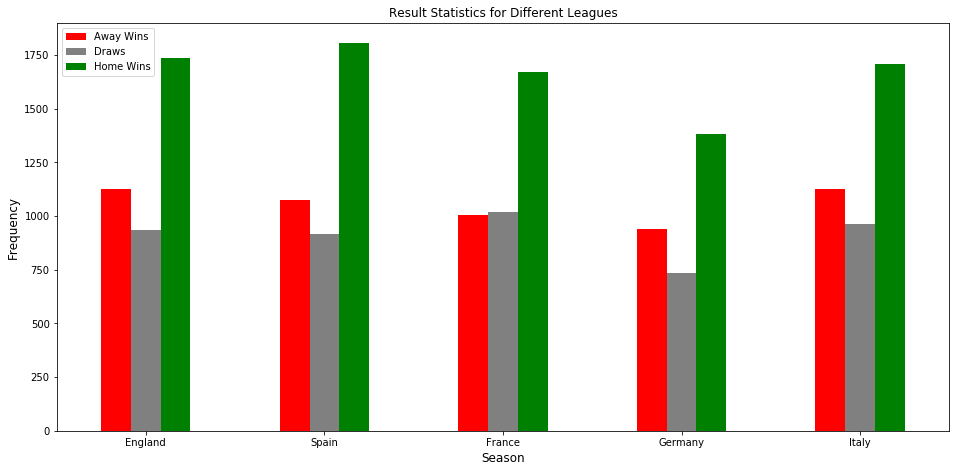

In [5]:
#Plotting the result dataframe

# Replace H-A-D to Home Win-Away Win-Draw
data['FTR'] = data['FTR'].replace(['H'], 'Home Win')
data['FTR'] = data['FTR'].replace(['A'], 'Away Win')
data['FTR'] = data['FTR'].replace(['D'], 'Draw')

# Plots a line plot of the win percentages for different parameters in different seasons
ax = result_stats.transpose().plot(kind='bar', color = ['red','grey','green'], figsize = [16,7.5], 
                       title='Result Statistics for Different Leagues')
plt.xticks(rotation=0)
ax.set_ylabel('Frequency', size=12)
ax.set_xlabel('Season', size=12)
ax.legend(["Away Wins","Draws","Home Wins"]);

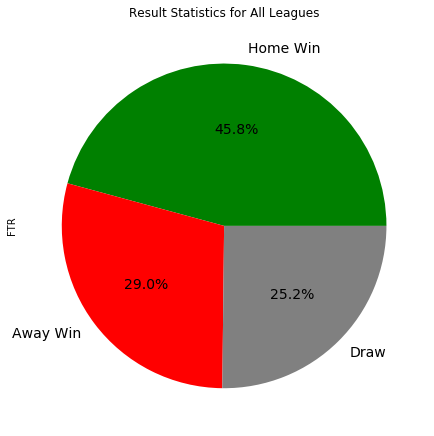

In [6]:
ax1 = plt.subplot(121, aspect='equal')
data['FTR'].value_counts().plot(kind='pie', colors = ['green','red','grey'],figsize = [16,7.5],ax=ax1,autopct='%1.1f%%',
                                fontsize=14,title='Result Statistics for All Leagues')

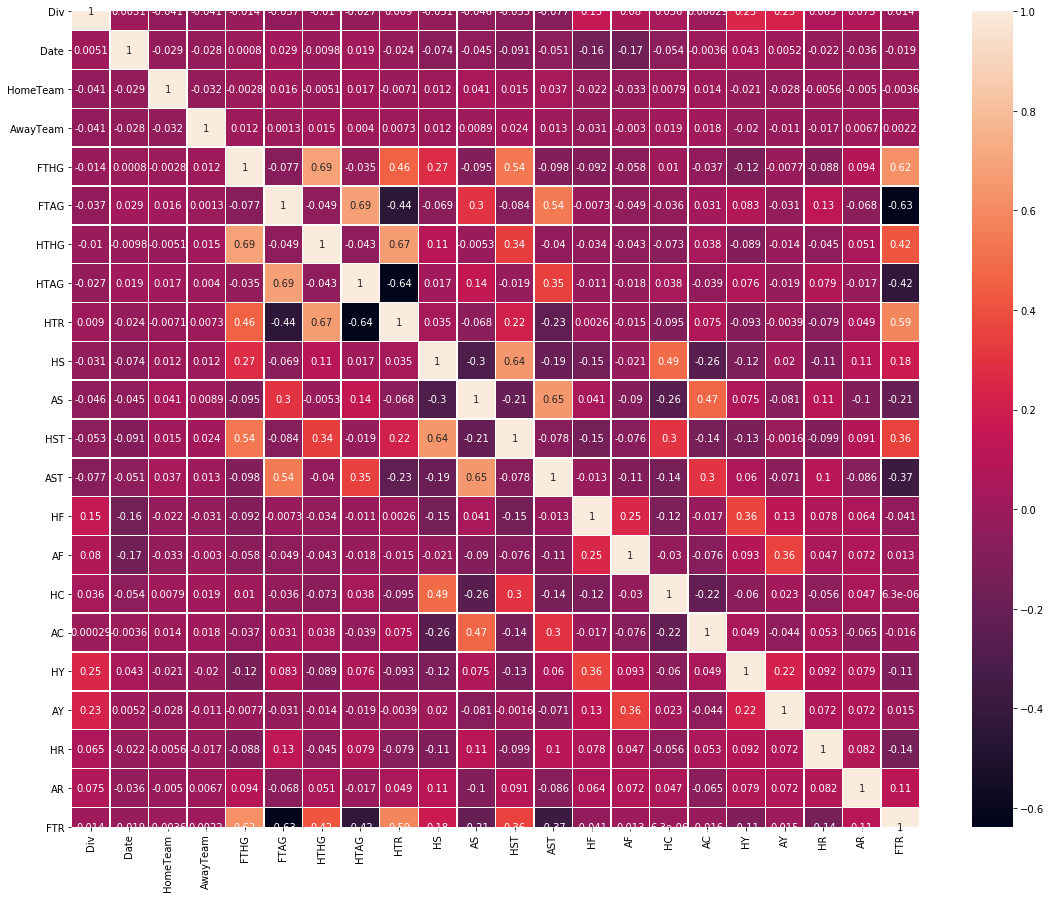

In [7]:
# Confusion Matrix for Original Data

# Filter unwanted columns
cols = ['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','HTR',
        'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','FTR']
data = data[cols]

# Data transformation
labelencoder = LabelEncoder()

data['Date'] = labelencoder.fit_transform(data['Date'])
data['Div'] = labelencoder.fit_transform(data['Div'])
data['HomeTeam'] = labelencoder.fit_transform(data['HomeTeam'])
data['AwayTeam'] = labelencoder.fit_transform(data['AwayTeam'])
data['HTR'] = labelencoder.fit_transform(data['HTR'])
data['FTR'] = labelencoder.fit_transform(data['FTR'])

corrMatrix = data.corr()

f = plt.figure(figsize=(19, 15))
sn.heatmap(corrMatrix, annot=True, linewidths=.5)
plt.show()

In [8]:
# Reading the dataset through a Pandas function
data = pd.read_csv("ovr_data.csv")

data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,FTR.1
0,E0,2010-08-14,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,...,M,M,M,M,M,M,M,M,1,H
1,E0,2010-08-14,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,...,M,M,M,M,M,M,M,M,1,H
2,E0,2010-08-14,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,...,M,M,M,M,M,M,M,M,1,D
3,E0,2010-08-14,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,...,M,M,M,M,M,M,M,M,1,H
4,E0,2010-08-14,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,...,M,M,M,M,M,M,M,M,1,D


In [9]:
# Data Manipulation

# Remove rows with missing value
data = data.dropna()

# Parse all the columns to integer for convenience
data['FTHG'] = data['FTHG'].astype(int)
data['FTAG'] = data['FTAG'].astype(int)
data['HS'] = data['HS'].astype(int)
data['AS'] = data['AS'].astype(int)
data['HST'] = data['HST'].astype(int)
data['AST'] = data['AST'].astype(int)
data['HF'] = data['HF'].astype(int)
data['AF'] = data['AF'].astype(int)
data['HC'] = data['HC'].astype(int)
data['AC'] = data['AC'].astype(int)
data['HY'] = data['HY'].astype(int)
data['AY'] = data['AY'].astype(int)
data['HR'] = data['HR'].astype(int)
data['AR'] = data['AR'].astype(int)

# Filter by Division
def Div(Div):
    
    return data[data['Div'] == Div][['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','HTR',
                                     'HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','B365H','B365D','B365A',
                                     'HTGS','ATGS','HTGC','ATGC','HTP','ATP',
                                     'HM1','HM2','HM3','HM4','HM5','AM1','AM2','AM3','AM4','AM5','MW','FTR']]
# data = Div("E0")

# Calculate Goal Scored Difference
data["TGSDiff"] = (data["HTGS"] - data["ATGS"])

# Calculate Goal Scored Difference
data["TGCDiff"] = (data["HTGC"] - data["ATGC"])

# Calculate Point Difference
data["PDiff"] = (data["HTP"] - data["ATP"])

# Calculate Form Points
# HM1
data['HM1'] = data['HM1'].replace(['M'], '0')
data['HM1'] = data['HM1'].replace(['W'], '3')
data['HM1'] = data['HM1'].replace(['D'], '1')
data['HM1'] = data['HM1'].replace(['L'], '0')

# HM2
data['HM2'] = data['HM2'].replace(['M'], '0')
data['HM2'] = data['HM2'].replace(['W'], '3')
data['HM2'] = data['HM2'].replace(['D'], '1')
data['HM2'] = data['HM2'].replace(['L'], '0')

# HM3
data['HM3'] = data['HM3'].replace(['M'], '0')
data['HM3'] = data['HM3'].replace(['W'], '3')
data['HM3'] = data['HM3'].replace(['D'], '1')
data['HM3'] = data['HM3'].replace(['L'], '0')

# HM4
data['HM4'] = data['HM4'].replace(['M'], '0')
data['HM4'] = data['HM4'].replace(['W'], '3')
data['HM4'] = data['HM4'].replace(['D'], '1')
data['HM4'] = data['HM4'].replace(['L'], '0')

# HM5
data['HM5'] = data['HM5'].replace(['M'], '0')
data['HM5'] = data['HM5'].replace(['W'], '3')
data['HM5'] = data['HM5'].replace(['D'], '1')
data['HM5'] = data['HM5'].replace(['L'], '0')

# AM1
data['AM1'] = data['AM1'].replace(['M'], '0')
data['AM1'] = data['AM1'].replace(['W'], '3')
data['AM1'] = data['AM1'].replace(['D'], '1')
data['AM1'] = data['AM1'].replace(['L'], '0')

# AM2
data['AM2'] = data['AM2'].replace(['M'], '0')
data['AM2'] = data['AM2'].replace(['W'], '3')
data['AM2'] = data['AM2'].replace(['D'], '1')
data['AM2'] = data['AM2'].replace(['L'], '0')

# AM3
data['AM3'] = data['AM3'].replace(['M'], '0')
data['AM3'] = data['AM3'].replace(['W'], '3')
data['AM3'] = data['AM3'].replace(['D'], '1')
data['AM3'] = data['AM3'].replace(['L'], '0')

# AM4
data['AM4'] = data['AM4'].replace(['M'], '0')
data['AM4'] = data['AM4'].replace(['W'], '3')
data['AM4'] = data['AM4'].replace(['D'], '1')
data['AM4'] = data['AM4'].replace(['L'], '0')

# AM5
data['AM5'] = data['AM5'].replace(['M'], '0')
data['AM5'] = data['AM5'].replace(['W'], '3')
data['AM5'] = data['AM5'].replace(['D'], '1')
data['AM5'] = data['AM5'].replace(['L'], '0')

# Parse value to integer
data[["HM1","HM2","HM3","HM4","HM5","AM1","AM2","AM3","AM4","AM5"]] = data[["HM1","HM2","HM3","HM4","HM5",
                                                                            "AM1","AM2","AM3","AM4","AM5"]].astype(int)

# Home
data["HFP3"] = (data["HM1"] + data["HM2"] + data["HM3"])
data["HFP5"] = (data["HM1"] + data["HM2"] + data["HM3"] + data["HM4"] + data["HM5"])

# Away
data["AFP3"] = (data["AM1"] + data["AM2"] + data["AM3"])
data["AFP5"] = (data["AM1"] + data["AM2"] + data["AM3"] + data["AM4"] + data["AM5"])

# Difference
data["FPDiff3"] = (data["HFP3"] - data["AFP3"])
data["FPDiff5"] = (data["HFP5"] - data["AFP5"])

data.dtypes

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int32
FTAG          int32
FTR          object
HTHG        float64
HTAG        float64
HTR          object
HS            int32
AS            int32
HST           int32
AST           int32
HF            int32
AF            int32
HC            int32
AC            int32
HY            int32
AY            int32
HR            int32
AR            int32
B365H       float64
B365D       float64
B365A       float64
HTGS        float64
ATGS        float64
HTGC        float64
ATGC        float64
HTP           int64
ATP           int64
HM1           int32
HM2           int32
HM3           int32
HM4           int32
HM5           int32
AM1           int32
AM2           int32
AM3           int32
AM4           int32
AM5           int32
MW            int64
FTR.1        object
TGSDiff     float64
TGCDiff     float64
PDiff         int64
HFP3          int32
HFP5          int32
AFP3          int32
AFP5          int32


In [10]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,FTR.1,TGSDiff,TGCDiff,PDiff,HFP3,HFP5,AFP3,AFP5,FPDiff3,FPDiff5
0,E0,2010-08-14,Aston Villa,West Ham,3,0,H,2.0,0.0,H,...,H,0.0,0.0,0,0,0,0,0,0,0
1,E0,2010-08-14,Blackburn,Everton,1,0,H,1.0,0.0,H,...,H,0.0,0.0,0,0,0,0,0,0,0
2,E0,2010-08-14,Bolton,Fulham,0,0,D,0.0,0.0,D,...,D,0.0,0.0,0,0,0,0,0,0,0
3,E0,2010-08-14,Chelsea,West Brom,6,0,H,2.0,0.0,H,...,H,0.0,0.0,0,0,0,0,0,0,0
4,E0,2010-08-14,Sunderland,Birmingham,2,2,D,1.0,0.0,H,...,D,0.0,0.0,0,0,0,0,0,0,0


In [11]:
# Data transformation
labelencoder = LabelEncoder()

data['Date'] = labelencoder.fit_transform(data['Date'])
data['Div'] = labelencoder.fit_transform(data['Div'])
data['HomeTeam'] = labelencoder.fit_transform(data['HomeTeam'])
data['AwayTeam'] = labelencoder.fit_transform(data['AwayTeam'])

# Filter unwanted columns
cols = ['Div','Date','HomeTeam','AwayTeam','HTGS','ATGS','TGSDiff','HTGC','ATGC','TGCDiff','HTP','ATP','PDiff',
        'HM1','HM2','HM3','HM4','HM5','AM1','AM2','AM3','AM4','AM5','MW','HFP3','AFP3','HFP5','AFP5','FPDiff3','FPDiff5','FTR']
data = data[cols]

# For new dataset
# data['HTR'] = labelencoder.fit_transform(data['HTR'])
data['HM1'] = labelencoder.fit_transform(data['HM1'])
data['HM2'] = labelencoder.fit_transform(data['HM2'])
data['HM3'] = labelencoder.fit_transform(data['HM3'])
data['HM4'] = labelencoder.fit_transform(data['HM4'])
data['HM5'] = labelencoder.fit_transform(data['HM5'])
data['AM1'] = labelencoder.fit_transform(data['AM1'])
data['AM2'] = labelencoder.fit_transform(data['AM2'])
data['AM3'] = labelencoder.fit_transform(data['AM3'])
data['AM4'] = labelencoder.fit_transform(data['AM4'])
data['AM5'] = labelencoder.fit_transform(data['AM5'])
data['FTR'] = labelencoder.fit_transform(data['FTR'])

data.dtypes

Div           int32
Date          int32
HomeTeam      int32
AwayTeam      int32
HTGS        float64
ATGS        float64
TGSDiff     float64
HTGC        float64
ATGC        float64
TGCDiff     float64
HTP           int64
ATP           int64
PDiff         int64
HM1           int64
HM2           int64
HM3           int64
HM4           int64
HM5           int64
AM1           int64
AM2           int64
AM3           int64
AM4           int64
AM5           int64
MW            int64
HFP3          int32
AFP3          int32
HFP5          int32
AFP5          int32
FPDiff3       int32
FPDiff5       int32
FTR           int32
dtype: object

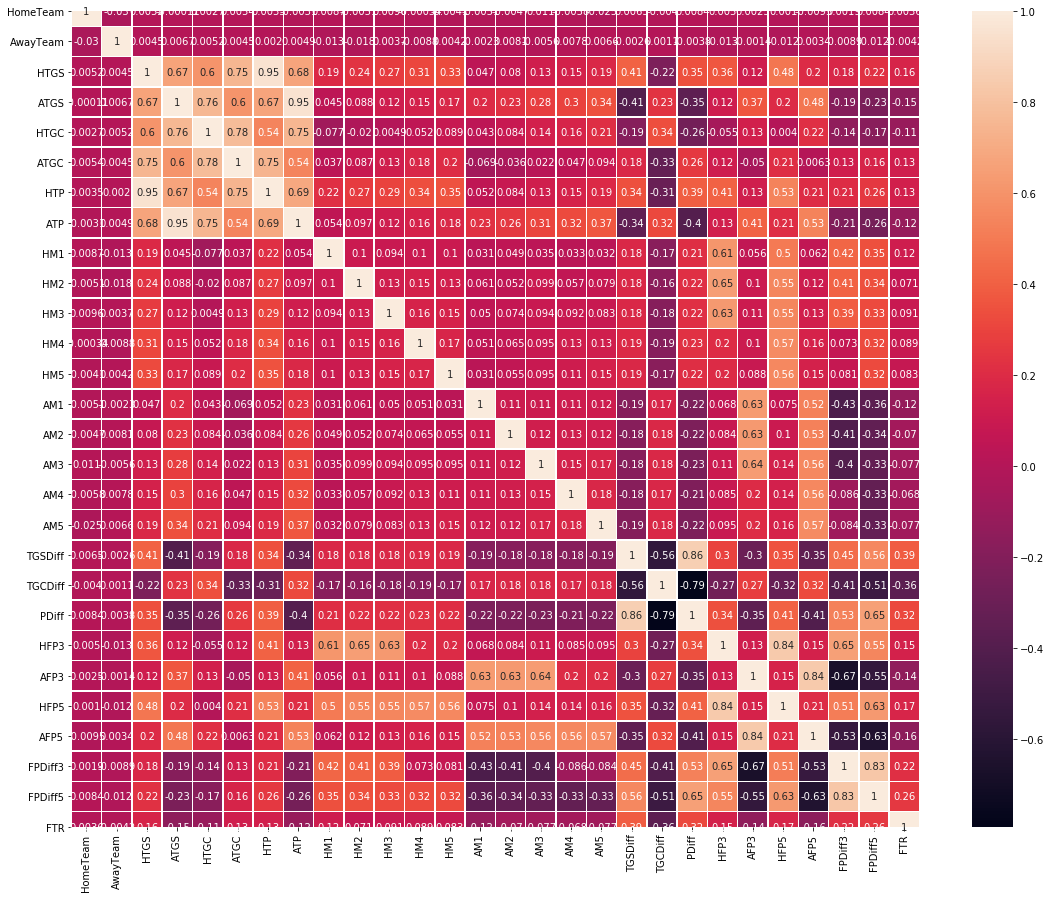

In [12]:
# 2. H2H Stats
# 3. Point difference in real-time season
# 4. Team Forms
# 6. Number of goals scored and concede


# Create Confusion Matrix
cols = ['HomeTeam', 'AwayTeam','HTGS','ATGS','HTGC','ATGC','HTP','ATP',
        'HM1','HM2','HM3','HM4','HM5','AM1','AM2','AM3','AM4','AM5',
        'TGSDiff','TGCDiff','PDiff','HFP3','AFP3','HFP5','AFP5','FPDiff3','FPDiff5','FTR']
data = data[cols]

corrMatrix = data.corr()

f = plt.figure(figsize=(19, 15))
sn.heatmap(corrMatrix, annot=True, linewidths=.5)
plt.show()

# corrMatrix = sns.heatmap(data, annot=True)
# bottom, top = ax.get_ylim()
# corrMatrix.set_ylim(bottom + 0.5, top - 0.5)

In [13]:
# Factor 2: Head-to-Head vs FTR
data[list(['HomeTeam','AwayTeam','FTR'])].corr()

,HomeTeam,AwayTeam,FTR
HomeTeam,1.000000,-0.029739,0.003605
AwayTeam,-0.029739,1.000000,-0.004249
FTR,0.003605,-0.004249,1.000000


In [14]:
# Factor 3: Point Diff vs FTR
data[list(['PDiff','FTR'])].corr()

,PDiff,FTR
PDiff,1.000000,0.319012
FTR,0.319012,1.000000


In [15]:
# Factor 4: Team Form Points

# Correlation of team forms and FTR
data[list(['FTR','HM1','HM2','HM3','HM4','HM5','AM1','AM2','AM3','AM4','AM5',
           'HFP3','AFP3','HFP5','AFP5','FPDiff3','FPDiff5'])].corr()

,FTR,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HFP3,AFP3,HFP5,AFP5,FPDiff3,FPDiff5
FTR,1.000000,0.120490,0.071319,0.091372,0.089271,0.082606,-0.121536,-0.070185,-0.076611,-0.068485,-0.076816,0.151007,-0.142553,0.168241,-0.155278,0.222105,0.257015
HM1,0.120490,1.000000,0.102358,0.094041,0.102527,0.099943,0.030576,0.049493,0.035439,0.032692,0.031988,0.614442,0.055608,0.502348,0.061618,0.419336,0.348365
HM2,0.071319,0.102358,1.000000,0.130118,0.146610,0.134853,0.061143,0.051864,0.098649,0.057045,0.078770,0.646829,0.101346,0.551646,0.115726,0.408818,0.344208
HM3,0.091372,0.094041,0.130118,1.000000,0.155077,0.153160,0.049754,0.073841,0.094108,0.092041,0.083331,0.627929,0.106694,0.547243,0.132376,0.390540,0.327441
HM4,0.089271,0.102527,0.146610,0.155077,1.000000,0.172532,0.051403,0.065135,0.095379,0.126402,0.128280,0.203082,0.104378,0.569079,0.158744,0.073061,0.323683
HM5,0.082606,0.099943,0.134853,0.153160,0.172532,1.000000,0.031343,0.055213,0.094866,0.113314,0.147551,0.197003,0.088051,0.557031,0.148953,0.080935,0.321961
AM1,-0.121536,0.030576,0.061143,0.049754,0.051403,0.031343,1.000000,0.107722,0.107690,0.111119,0.116651,0.067956,0.631173,0.075108,0.524073,-0.429924,-0.358672
AM2,-0.070185,0.049493,0.051864,0.073841,0.065135,0.055213,0.107722,1.000000,0.124874,0.131132,0.121771,0.084302,0.626287,0.100593,0.528639,-0.413918,-0.342147
AM3,-0.076611,0.035439,0.098649,0.094108,0.095379,0.094866,0.107690,0.124874,1.000000,0.147642,0.165705,0.109871,0.639437,0.140063,0.557734,-0.404725,-0.334126
AM4,-0.068485,0.032692,0.057045,0.092041,0.126402,0.113314,0.111119,0.131132,0.147642,1.000000,0.179095,0.084869,0.196034,0.139958,0.557481,-0.085615,-0.334006


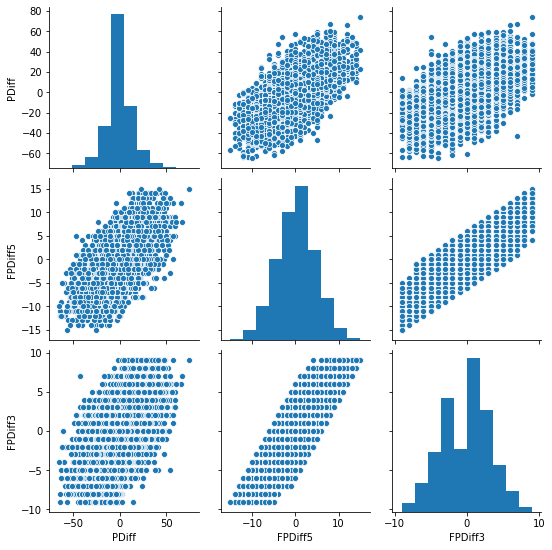

In [16]:
sns.pairplot(data[['PDiff','FPDiff5', 'FPDiff3']])

In [17]:
# Constructing scatter plot and regression line
X = data['FPDiff5']
y = data['PDiff']

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
print(lm.coef_)

[[2.08546931]]


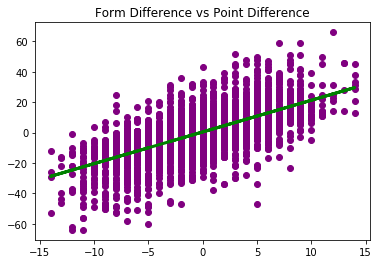

In [19]:
predictions = lm.predict(X_test)

plt.scatter(X_test, y_test,  color='purple')
plt.plot(X_test, predictions, color='green', linewidth=3)
plt.title("Form Difference vs Point Difference")

plt.show()

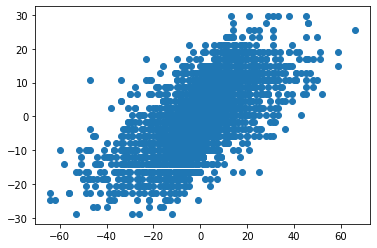

In [20]:
plt.scatter(y_test,predictions)

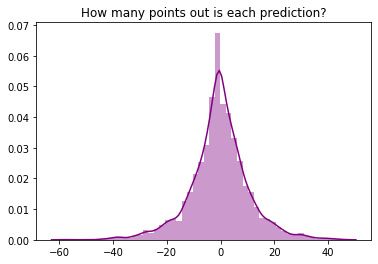

In [21]:
plt.title('How many points out is each prediction?')
sns.distplot((y_test-predictions),bins=50, color = 'purple')

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

Mean Absolute Error: 7.86538214004966


In [23]:
# Factor 5: Goals Scored and Conceded VS FTR
data[list(['HTGS','ATGS','HTGC','ATGC','FTR'])].corr()

,HTGS,ATGS,HTGC,ATGC,FTR
HTGS,1.000000,0.667713,0.603006,0.751411,0.164191
ATGS,0.667713,1.000000,0.755797,0.602847,-0.150783
HTGC,0.603006,0.755797,1.000000,0.780268,-0.110414
ATGC,0.751411,0.602847,0.780268,1.000000,0.130177
FTR,0.164191,-0.150783,-0.110414,0.130177,1.000000


In [24]:
data[list(['TGSDiff','TGCDiff','FTR'])].corr()

,TGSDiff,TGCDiff,FTR
TGSDiff,1.000000,-0.557621,0.386382
TGCDiff,-0.557621,1.000000,-0.362874
FTR,0.386382,-0.362874,1.000000


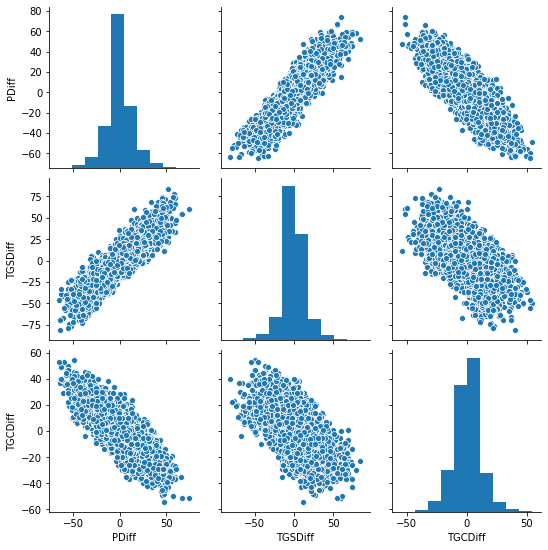

In [25]:
sns.pairplot(data[['PDiff', 'TGSDiff', 'TGCDiff']])